In [1]:
!ls

Dockerfile	   data_processed		   setup.cfg
LICENSE.txt	   docs				   setup.py
README.md	   environment.yml		   sklearn_predict.py
Test.ipynb	   fingerprint.py		   sklearn_train.py
__MACOSX	   hyperparameter_optimization.py  split_units.out
__init__.py	   interpret.py			   split_units_new.out
checkpoint	   my_test.ipynb		   tests
chemprop	   nohup.out			   train.py
chemprop.egg-info  predict.py			   web.py
data		   scripts


In [4]:
import numpy as np
import pandas as pd
import re

with open("results/split_units_0.2_256_5e-3_shared_layer.out") as f:
#     while (a!="Command line"):
    a = f.readlines()

loss_list = []
val_aucs = []

for i in np.arange(3886, 14356):
#     try:
#         if (a[i][50]=='L'):
#             loss_list.append(float(a[i][57:67]))
#         if (a[i][51]=='L'):
#             loss_list.append(float(a[i][58:68]))
#         if (a[i][52]=='L'):
#             loss_list.append(float(a[i][59:69]))
#     except:
#         pass
    try:
        _, end = re.search("Loss", a[i]).span()
        loss_list.append(float(a[i][(end+3):(end+13)]))
    except:
        pass
    try:
        _, end = re.search("AValidation", a[i]).span()
        val_aucs.append(float(a[i][(end+7):(end+15)]))
    except:
        pass

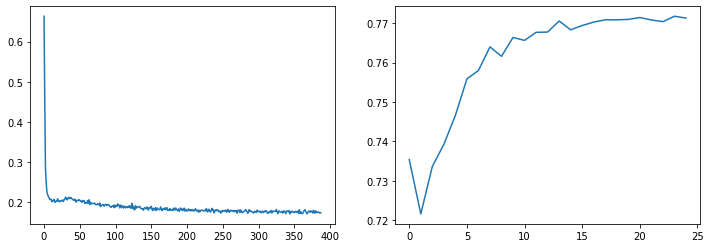

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(np.arange(0, len(loss_list)), loss_list[0:])

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, len(val_aucs)), val_aucs[0:])


In [ ]:
from sklearn.decomposition import TruncatedSVD

mono = pd.read_csv("data/mono.csv")

svd = TruncatedSVD
